## Ph√¢n t√≠ch xu h∆∞·ªõng s·ªü th√≠ch √¢m nh·∫°c

#### Import c√°c th∆∞ vi·ªán v√† c√°c package c·∫ßn thi·∫øt

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from matplotlib.figure import Figure 
from wordcloud import WordCloud

Fontconfig warning: ignoring UTF-8: not a valid region tag


#### Load d·ªØ li·ªáu

In [2]:
df_normal  = pd.read_csv('list_info_02.csv') # Load c√°c th√¥ng tin c√°c video v·ªÅ √¢m nh·∫°c th∆∞·ªùng
# df = pd.read_csv('list_info_trending.csv') # Load th√¥ng tin c√°c video v·ªÅ √¢m nh·∫°c trending
df_normal.head()


id             publishAt  \
0  8zKpSM3kDt4  2022-06-25T10:21:40Z   
1  PnITknczlvU  2022-06-25T10:30:04Z   
2  JI-9dc-J1RU  2022-06-26T08:00:30Z   
3  0zpVSx9LHao  2021-06-09T11:00:00Z   
4  5BQKXF56e8A  2022-04-11T12:00:03Z   

                                               title  \
0  Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...   
1  EDM TikTok Hay 2022 - BXH Nh·∫°c Tr·∫ª Remix Hay N...   
2  Nh·∫°c Tr·∫ª Ballad Vi·ªát Hay Nh·∫•t 2022 | Lk Nh·∫°c T...   
3  Top 40 B√†i H√°t Vpop ƒê·∫°t H√†ng Tri·ªáu Views Tr√™n ...   
4  Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n Kh√∫c Nh·∫°c ...   

                                         description        channelTitle  \
0  Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...  ACV Music Trending   
1  EDM TikTok Hay 2022 - BXH Nh·∫°c Tr·∫ª Remix Hay N...         Orinn Remix   
2  Nh·∫°c Tr·∫ª Ballad Vi·ªát Hay Nh·∫•t 2022 | Lk Nh·∫°c T...          ACV Ballad   
3  Top 40 B√†i H√°t Vpop ƒê·∫°t H√†ng Tri·ªáu Views Tr√™n ...  TPT Music For Life   
4  Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n Kh√∫c Nh·∫°c ...       Sai Gon Music   

                                                tags  categoryId  \
0  ['acv trending', 'acv', 'nhac tre moi nhat', '...          10   
1  ['orinn remix', 'nh·∫°c tr·∫ª', 'nhac tre', 'nh·∫°c ...          10   
2  ['acv', 'acv ballad', 'nh·∫°c tr·∫ª', 'nhac tre', ...          22   
3  ['tuy·ªÉn t·∫≠p nh·∫°c tr·∫ª', 'top 40 b√†i h√°t', 'tuy·ªÉ...          10   
4  ['Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi', 'Li√™n Kh√∫c Nh...          10   

  defaultAudioLanguage    duration dimension  ... caption  privacyStatus  \
0                   vi  PT1H37M13S        2d  ...   False         public   
1                   vi   PT1H9M42S        2d  ...   False         public   
2                  NaN  PT1H32M45S        2d  ...   False         public   
3                   vi   PT2H49M7S        2d  ...    True         public   
4                  NaN  PT2H15M17S        2d  ...   False         public   

  embeddable  madeForKids  viewCount  likeCount  dislikeCount  favoriteCount  \
0       True        False      93101        NaN           NaN              0   
1       True        False     145034        NaN           NaN              0   
2       True        False      16549        NaN           NaN              0   
3       True        False    1501371     4832.0           NaN              0   
4       True        False    1179069     4322.0           NaN              0   

   commentCount                                    topicCategories  
0          13.0            ['https://en.wikipedia.org/wiki/Music']  
1          38.0  ['https://en.wikipedia.org/wiki/Electronic_mus...  
2           3.0  ['https://en.wikipedia.org/wiki/Music', 'https...  
3         118.0  ['https://en.wikipedia.org/wiki/Music', 'https...  
4          78.0  ['https://en.wikipedia.org/wiki/Electronic_mus...  

[5 rows x 21 columns]

In [3]:
# Xem th√¥ng tin t·ªïng quan v·ªÅ data frame
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3189 non-null   object 
 1   publishAt             3189 non-null   object 
 2   title                 3189 non-null   object 
 3   description           3116 non-null   object 
 4   channelTitle          3189 non-null   object 
 5   tags                  2835 non-null   object 
 6   categoryId            3189 non-null   int64  
 7   defaultAudioLanguage  1738 non-null   object 
 8   duration              3189 non-null   object 
 9   dimension             3189 non-null   object 
 10  definition            3189 non-null   object 
 11  caption               3189 non-null   bool   
 12  privacyStatus         3189 non-null   object 
 13  embeddable            3189 non-null   bool   
 14  madeForKids           3189 non-null   bool   
 15  viewCount            

In [4]:
# L·ªçc ra c√°c video √¢m nh·∫°c t·ª©c categoryId l√† 10 - Music
df_normal = df_normal[df_normal['categoryId']==10]

In [5]:
# X·ª≠ l√Ω c√°c gi√° tr·ªã null trong data frame
df_normal_preprocessed = df_normal.fillna({'description':'', 'tags':'', 'defaultAudioLanguage':'', 'likeCount':0, 'dislikeCount':0, 'commentCount':0, 'topicCategories':'' })
df_normal_preprocessed.head()

id             publishAt  \
0  8zKpSM3kDt4  2022-06-25T10:21:40Z   
1  PnITknczlvU  2022-06-25T10:30:04Z   
3  0zpVSx9LHao  2021-06-09T11:00:00Z   
4  5BQKXF56e8A  2022-04-11T12:00:03Z   
5  yJFTFdgH5Bc  2022-05-22T03:00:18Z   

                                               title  \
0  Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...   
1  EDM TikTok Hay 2022 - BXH Nh·∫°c Tr·∫ª Remix Hay N...   
3  Top 40 B√†i H√°t Vpop ƒê·∫°t H√†ng Tri·ªáu Views Tr√™n ...   
4  Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n Kh√∫c Nh·∫°c ...   
5  TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªáu View Hay Nh...   

                                         description        channelTitle  \
0  Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...  ACV Music Trending   
1  EDM TikTok Hay 2022 - BXH Nh·∫°c Tr·∫ª Remix Hay N...         Orinn Remix   
3  Top 40 B√†i H√°t Vpop ƒê·∫°t H√†ng Tri·ªáu Views Tr√™n ...  TPT Music For Life   
4  Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n Kh√∫c Nh·∫°c ...       Sai Gon Music   
5  TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªáu View Hay Nh...  TPT Music For Life   

                                                tags  categoryId  \
0  ['acv trending', 'acv', 'nhac tre moi nhat', '...          10   
1  ['orinn remix', 'nh·∫°c tr·∫ª', 'nhac tre', 'nh·∫°c ...          10   
3  ['tuy·ªÉn t·∫≠p nh·∫°c tr·∫ª', 'top 40 b√†i h√°t', 'tuy·ªÉ...          10   
4  ['Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi', 'Li√™n Kh√∫c Nh...          10   
5  ['tuy·ªÉn t·∫≠p nh·∫°c tr·∫ª', 'nh·∫°c tr·∫ª hay nh·∫•t', 'n...          10   

  defaultAudioLanguage    duration dimension  ... caption  privacyStatus  \
0                   vi  PT1H37M13S        2d  ...   False         public   
1                   vi   PT1H9M42S        2d  ...   False         public   
3                   vi   PT2H49M7S        2d  ...    True         public   
4                       PT2H15M17S        2d  ...   False         public   
5                   vi  PT2H57M15S        2d  ...    True         public   

  embeddable  madeForKids  viewCount  likeCount  dislikeCount  favoriteCount  \
0       True        False      93101        0.0           0.0              0   
1       True        False     145034        0.0           0.0              0   
3       True        False    1501371     4832.0           0.0              0   
4       True        False    1179069     4322.0           0.0              0   
5       True        False     163239      644.0           0.0              0   

   commentCount                                    topicCategories  
0          13.0            ['https://en.wikipedia.org/wiki/Music']  
1          38.0  ['https://en.wikipedia.org/wiki/Electronic_mus...  
3         118.0  ['https://en.wikipedia.org/wiki/Music', 'https...  
4          78.0  ['https://en.wikipedia.org/wiki/Electronic_mus...  
5          18.0  ['https://en.wikipedia.org/wiki/Music', 'https...  

[5 rows x 21 columns]

In [6]:
# M√¥ t·∫£ c√°c thu·ªôc t√≠nh c√≥ gi√° tr·ªã nguy√™n
df_normal.describe()

categoryId     viewCount     likeCount  dislikeCount  favoriteCount  \
count      2241.0  2.241000e+03  1.683000e+03           0.0         2241.0   
mean         10.0  7.775915e+06  2.003483e+05           NaN            0.0   
std           0.0  3.580610e+07  8.885508e+05           NaN            0.0   
min          10.0  0.000000e+00  0.000000e+00           NaN            0.0   
25%          10.0  6.026300e+04  1.491000e+03           NaN            0.0   
50%          10.0  2.712540e+05  8.566000e+03           NaN            0.0   
75%          10.0  2.281190e+06  7.562500e+04           NaN            0.0   
max          10.0  7.119095e+08  1.661710e+07           NaN            0.0   

       commentCount  
count  2.232000e+03  
mean   1.077051e+04  
std    1.146454e+05  
min    0.000000e+00  
25%    2.000000e+01  
50%    7.900000e+01  
75%    1.151500e+03  
max    3.511755e+06

In [7]:
# V·∫Ω bi·ªÉu ƒë·ªì tr√≤n th·ªëng k√™ theo s·ªë view c·ªßa c√°c video
def pieCharViewCounts(df):
    listVideo_10KView = df[df['viewCount']<100000]['id']
    listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
    listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
    listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
    listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']

    y = np.array([len(listVideo_10KView),
                    len(listVideo_100KView),
                    len(listVideo_1MView),
                    len(listVideo_10MView),
                    len(listVideo_100MView),
                ])
    mylabel = ['Video chuc nghin view', 'Video tram nghin view', 'Video trieu view', 'Video chuc trieu view', 'Video tram trieu view']
   
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    plt.pie(y, labels=mylabel)
    plt.show()

/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_1416/1180833226.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_1416/1180833226.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_1416/1180833226.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_1416/1180833226.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


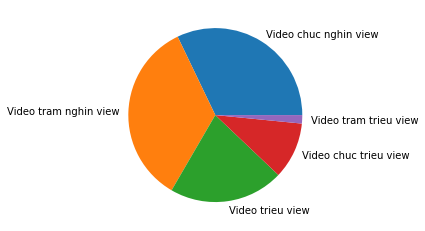

In [8]:
pieCharViewCounts(df_normal)

#### X·ª≠ l√Ω tag v√† t√™n channel (th√™m "_" v√†o c√°c tag)


In [9]:
df_normal_preprocessed['tags'].fillna('', inplace=True)

In [10]:
def removeSpace(listItems, noise):
    tagsPreprocessed = []
    for item in listItems:
        if item == noise:
            tagsPreprocessed.append(item)
            continue
        item = item.replace(' ','_')
        item = item.replace(',_',', ')
        tagsPreprocessed.append(item)
    # print(tagsPreprocessed)
    return tagsPreprocessed

In [11]:
print(df_normal_preprocessed['tags'])
tagsPreprocessed = removeSpace(df_normal_preprocessed['tags'], ' ')
# df_normal_preprocessed.drop(columns=['tags'])
# df_normal_preprocessed.assign(tags = tagsPreprocessed)
# print(df_normal_preprocessed['tags'])
# print(tagsPreprocessed)
df_normal_preprocessed['tags'] = tagsPreprocessed

0       ['acv trending', 'acv', 'nhac tre moi nhat', '...
1       ['orinn remix', 'nh·∫°c tr·∫ª', 'nhac tre', 'nh·∫°c ...
3       ['tuy·ªÉn t·∫≠p nh·∫°c tr·∫ª', 'top 40 b√†i h√°t', 'tuy·ªÉ...
4       ['Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi', 'Li√™n Kh√∫c Nh...
5       ['tuy·ªÉn t·∫≠p nh·∫°c tr·∫ª', 'nh·∫°c tr·∫ª hay nh·∫•t', 'n...
                              ...                        
3181                                                     
3182    ['AMV', 'Gigiboz', 'Nh√£ ƒëan Thi√™n n·ªØ', 'Himeka...
3184    ['y√™u edm vn', 'nhac thai lan remix', 'nhac ti...
3185    ['nhac tre', 'nh·∫°c tr·∫ª remix', 'nhac tre remix...
3187    ['nh·∫°c bu·ªìn', 'nh·∫°c t√¢m tr·∫°ng', 'nhac buon', '...
Name: tags, Length: 2241, dtype: object


#### X·ª≠ l√Ω topic categories

In [12]:
df_normal_preprocessed['topicCategories'] = df_normal['topicCategories'].fillna('')

In [13]:
listTopics=[]
for index, row in df_normal_preprocessed.iterrows():
    listTopic = row['topicCategories']
    if listTopic == '':
        listTopics.append(listTopic)
        continue
    topicStr = ''
    listTopic = listTopic.replace('https://en.wikipedia.org/wiki/','')
    listTopic = listTopic.replace("'Music'",'')
    listTopic = listTopic.replace(',','')
    listTopic = listTopic.replace('[','')
    listTopic = listTopic.replace(']','')
    listTopic = listTopic.replace('\'','')
    print(listTopic)
    listTopics.append(listTopic)
    #     #topic = topic.removesuffix("https://en.wikipedia.org/wiki/")
    #     print(topic)

print(type(listTopics))


Electronic_music  Pop_music
 Pop_music
Electronic_music  Pop_music
 Music_of_Asia Pop_music
 Pop_music
Electronic_music 
Electronic_music  Pop_music
Electronic_music 
Electronic_music  Pop_music
 Pop_music
 Pop_music
Electronic_music  Pop_music
Electronic_music 
Electronic_music  Pop_music
Electronic_music  Pop_music
Electronic_music 
 Music_of_Asia
Electronic_music  Pop_music
 Pop_music
 Pop_music

Classical_music 
Electronic_music  Pop_music
Electronic_music  Pop_music
 Pop_music
Electronic_music 
Electronic_music 
Electronic_music  Pop_music
Electronic_music 
Electronic_music 
Electronic_music  Pop_music
 Music_of_Asia Pop_music

 Pop_music
 Pop_music
Electronic_music 


Electronic_music 
Electronic_music  Pop_music
Electronic_music  Pop_music
Electronic_music 
Electronic_music  Pop_music
Electronic_music  Pop_music
Electronic_music  Pop_music

Electronic_music  Pop_music

Electronic_music 
Electronic_music  Pop_music Rhythm_and_blues Soul_music
Electronic_music  Pop_music Soul_mus

In [14]:
df_normal_preprocessed['topicCategories'] = listTopics
df_normal_preprocessed

id             publishAt  \
0     8zKpSM3kDt4  2022-06-25T10:21:40Z   
1     PnITknczlvU  2022-06-25T10:30:04Z   
3     0zpVSx9LHao  2021-06-09T11:00:00Z   
4     5BQKXF56e8A  2022-04-11T12:00:03Z   
5     yJFTFdgH5Bc  2022-05-22T03:00:18Z   
...           ...                   ...   
3181  ElLRQwiyBIs  2019-07-21T12:22:46Z   
3182  N53Yo_FI-gc  2020-04-13T09:00:35Z   
3184  deQMpXKvhTw  2022-06-24T10:53:20Z   
3185  rdf0JJDksd8  2022-06-24T23:00:30Z   
3187  6xZUyMyiu9U  2022-06-24T12:00:05Z   

                                                  title  \
0     Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...   
1     EDM TikTok Hay 2022 - BXH Nh·∫°c Tr·∫ª Remix Hay N...   
3     Top 40 B√†i H√°t Vpop ƒê·∫°t H√†ng Tri·ªáu Views Tr√™n ...   
4     Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n Kh√∫c Nh·∫°c ...   
5     TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªáu View Hay Nh...   
...                                                 ...   
3181  TOP 10 CA KH√öC QU·ªêC T·∫æ HAY NH·∫§T M·ªåI TH·ªúI ƒê·∫†I -...   
3182  Ng√†n NƒÉm ƒë·ªÉ c·∫ßu Nguy·ªán ÂçÉÂπ¥„ÅÆÁ•à„Çä - Himekami (Âß´Á•û) -...   
3184  Nh·∫°c Th√°i Lan Remix HOT TIKTOK 2022 - Top B√†i ...   
3185  Top 20 B√†i H√°t Remix Hot Tiktok 2022 ‚úà Nh·∫°c Re...   
3187  Nh·∫°c Bu·ªìn TikTok | Nh·∫°c T√¢m Tr·∫°ng TikTok 2022 ...   

                                            description        channelTitle  \
0     Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...  ACV Music Trending   
1     EDM TikTok Hay 2022 - BXH Nh·∫°c Tr·∫ª Remix Hay N...         Orinn Remix   
3     Top 40 B√†i H√°t Vpop ƒê·∫°t H√†ng Tri·ªáu Views Tr√™n ...  TPT Music For Life   
4     Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n Kh√∫c Nh·∫°c ...       Sai Gon Music   
5     TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªáu View Hay Nh...  TPT Music For Life   
...                                                 ...                 ...   
3181  B·∫°n l√† 8X, 9X ƒë·ªùi ƒë·∫ßu? B·∫°n c√≥ t·ª´ng nghe nh·∫°c t...        Blog C·∫£m X√∫c   
3182  #Himekami #Nh√£ƒêanThi√™nN·ªØ #sennennoinori \nHime...            Gigi Boz   
3184  üî¥ CH√ÄO M·ª™NG ƒê·∫æN V·ªöI K√äNH Y√™u EDM Vn .\n\nüî∞ N·∫øu...        Y√™u EDM VN „ÉÑ   
3185  Top 20 B√†i H√°t Remix Hot Tiktok 2022 ‚úà Nh·∫°c Re...             Min Ciu   
3187  "Follow our Lofi Playlist - https://sptfy.com/...            Thu Sang   

                                                   tags  categoryId  \
0     ['acv_trending', 'acv', 'nhac_tre_moi_nhat', '...          10   
1     ['orinn_remix', 'nh·∫°c_tr·∫ª', 'nhac_tre', 'nh·∫°c_...          10   
3     ['tuy·ªÉn_t·∫≠p_nh·∫°c_tr·∫ª', 'top_40_b√†i_h√°t', 'tuy·ªÉ...          10   
4     ['Say_th√¨_c·ª©_say_y√™u_th√¨_b·ªè_ƒëi', 'Li√™n_Kh√∫c_Nh...          10   
5     ['tuy·ªÉn_t·∫≠p_nh·∫°c_tr·∫ª', 'nh·∫°c_tr·∫ª_hay_nh·∫•t', 'n...          10   
...                                                 ...         ...   
3181                                                             10   
3182  ['AMV', 'Gigiboz', 'Nh√£_ƒëan_Thi√™n_n·ªØ', 'Himeka...          10   
3184  ['y√™u_edm_vn', 'nhac_thai_lan_remix', 'nhac_ti...          10   
3185  ['nhac_tre', 'nh·∫°c_tr·∫ª_remix', 'nhac_tre_remix...          10   
3187  ['nh·∫°c_bu·ªìn', 'nh·∫°c_t√¢m_tr·∫°ng', 'nhac_buon', '...          10   

     defaultAudioLanguage    duration dimension  ... caption  privacyStatus  \
0                      vi  PT1H37M13S        2d  ...   False         public   
1                      vi   PT1H9M42S        2d  ...   False         public   
3                      vi   PT2H49M7S        2d  ...    True         public   
4                          PT2H15M17S        2d  ...   False         public   
5                      vi  PT2H57M15S        2d  ...    True         public   
...                   ...         ...       ...  ...     ...            ...   
3181                   vi    PT40M31S        2d  ...   False         public   
3182                   vi     PT2M11S        2d  ...   False         public   
3184            

#### X·ª≠ l√Ω th·ªùi gian 

In [15]:
def convertHour(str):
    if str.find('H') == -1:
        return 0
    hour = str.split('T')[1].split('H')[0]
    return hour

def convertMinute(str):
    if str.find('M') == -1:
        return 0
    if str.find('H') != -1:
        minute = str.split('H')[1].split('M')[0]
    else:
        minute = str.split('T')[1].split('M')[0]
    return minute

def convertSecond(str):
    if str.find('S') == -1:
        return 0
    if str.find('M') == -1:
        if str.find('H') == -1:
            second = str.split('T')[1].split('S')[0]
        else:    
            second = str.split('H')[1].split('S')[0]
    else:
        second = str.split('M')[1].split('S')[0]
    return second

In [16]:
hours, minutes, seconds = [], [], []
years, months, days = [], [], []
durationInt = []
for index, row in df_normal.iterrows():
    hours.append(int(convertHour(row['duration'])))
    minutes.append(int(convertMinute(row['duration'])))
    seconds.append(int(convertSecond(row['duration'])))
    years.append(int(row['publishAt'].split('-',1)[0]))
    months.append(int(row['publishAt'].split('-',1)[1].split('-',1)[0]))
    days.append(int(row['publishAt'].split('-',2)[2].split('T')[0]))
    durationInt.append(hours[-1]*60*60+minutes[-1]*60+seconds[-1])

In [17]:
df_normal_preprocessed = df_normal_preprocessed.assign(hourDuration=hours, minuteDuration=minutes, secondDuration=seconds, yearPublished=years, monthPublished=months, dayPublished=days, durationInt = durationInt)
df_normal_preprocessed.head()

id             publishAt  \
0  8zKpSM3kDt4  2022-06-25T10:21:40Z   
1  PnITknczlvU  2022-06-25T10:30:04Z   
3  0zpVSx9LHao  2021-06-09T11:00:00Z   
4  5BQKXF56e8A  2022-04-11T12:00:03Z   
5  yJFTFdgH5Bc  2022-05-22T03:00:18Z   

                                               title  \
0  Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...   
1  EDM TikTok Hay 2022 - BXH Nh·∫°c Tr·∫ª Remix Hay N...   
3  Top 40 B√†i H√°t Vpop ƒê·∫°t H√†ng Tri·ªáu Views Tr√™n ...   
4  Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n Kh√∫c Nh·∫°c ...   
5  TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªáu View Hay Nh...   

                                         description        channelTitle  \
0  Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...  ACV Music Trending   
1  EDM TikTok Hay 2022 - BXH Nh·∫°c Tr·∫ª Remix Hay N...         Orinn Remix   
3  Top 40 B√†i H√°t Vpop ƒê·∫°t H√†ng Tri·ªáu Views Tr√™n ...  TPT Music For Life   
4  Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n Kh√∫c Nh·∫°c ...       Sai Gon Music   
5  TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªáu View Hay Nh...  TPT Music For Life   

                                                tags  categoryId  \
0  ['acv_trending', 'acv', 'nhac_tre_moi_nhat', '...          10   
1  ['orinn_remix', 'nh·∫°c_tr·∫ª', 'nhac_tre', 'nh·∫°c_...          10   
3  ['tuy·ªÉn_t·∫≠p_nh·∫°c_tr·∫ª', 'top_40_b√†i_h√°t', 'tuy·ªÉ...          10   
4  ['Say_th√¨_c·ª©_say_y√™u_th√¨_b·ªè_ƒëi', 'Li√™n_Kh√∫c_Nh...          10   
5  ['tuy·ªÉn_t·∫≠p_nh·∫°c_tr·∫ª', 'nh·∫°c_tr·∫ª_hay_nh·∫•t', 'n...          10   

  defaultAudioLanguage    duration dimension  ... favoriteCount  commentCount  \
0                   vi  PT1H37M13S        2d  ...             0          13.0   
1                   vi   PT1H9M42S        2d  ...             0          38.0   
3                   vi   PT2H49M7S        2d  ...             0         118.0   
4                       PT2H15M17S        2d  ...             0          78.0   
5                   vi  PT2H57M15S        2d  ...             0          18.0   

               topicCategories  hourDuration  minuteDuration  secondDuration  \
0                                          1              37              13   
1  Electronic_music  Pop_music             1               9              42   
3                    Pop_music             2              49               7   
4  Electronic_music  Pop_music             2              15              17   
5      Music_of_Asia Pop_music             2              57              15   

   yearPublished  monthPublished  dayPublished  durationInt  
0           2022               6            25         5833  
1           2022               6            25         4182  
3           2021               6             9        10147  
4           2022               4            11         8117  
5           2022               5            22        10635  

[5 rows x 28 columns]

#### X·ª≠ l√Ω t√™n video 

In [18]:
# H√†m x√≥a b·ªè m·ªôt s·ªë t·ª´ g√¢y nhi·ªÖu
def removeStopword(texts, stopwords):
    tmpList = []
    for text in texts:
        text = text.lower()
        for stopword in stopwords:
            text = text.replace(stopword,'')
        tmpList.append(text)
    return tmpList

#### X·ª≠ l√Ω gi√° tr·ªã c√°c c·ªôt v·ªÅ s·ªë nguy√™n

In [19]:
le_captions = preprocessing.LabelEncoder()
le_captions.fit(df_normal['caption'])
df_normal_preprocessed['caption'] = le_captions.transform(df_normal['caption'])

le_embeddables = preprocessing.LabelEncoder()
le_embeddables.fit(df_normal['embeddable'])
df_normal_preprocessed['embeddable'] = le_embeddables.transform(df_normal['embeddable'])

le_madeForKids = preprocessing.LabelEncoder()
le_madeForKids.fit(df_normal['madeForKids'])
df_normal_preprocessed['madeForKids'] = le_madeForKids.transform(df_normal['madeForKids'])

le_privacyStatus = preprocessing.LabelEncoder()
le_privacyStatus.fit(df_normal['privacyStatus'])
df_normal_preprocessed['privacyStatus'] = le_privacyStatus.transform(df_normal['privacyStatus'])

le_definitions = preprocessing.LabelEncoder()
le_definitions.fit(df_normal['definition'])
df_normal_preprocessed['definition'] = le_definitions.transform(df_normal['definition'])

In [20]:
df_normal_preprocessed.head()

id             publishAt  \
0  8zKpSM3kDt4  2022-06-25T10:21:40Z   
1  PnITknczlvU  2022-06-25T10:30:04Z   
3  0zpVSx9LHao  2021-06-09T11:00:00Z   
4  5BQKXF56e8A  2022-04-11T12:00:03Z   
5  yJFTFdgH5Bc  2022-05-22T03:00:18Z   

                                               title  \
0  Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...   
1  EDM TikTok Hay 2022 - BXH Nh·∫°c Tr·∫ª Remix Hay N...   
3  Top 40 B√†i H√°t Vpop ƒê·∫°t H√†ng Tri·ªáu Views Tr√™n ...   
4  Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n Kh√∫c Nh·∫°c ...   
5  TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªáu View Hay Nh...   

                                         description        channelTitle  \
0  Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...  ACV Music Trending   
1  EDM TikTok Hay 2022 - BXH Nh·∫°c Tr·∫ª Remix Hay N...         Orinn Remix   
3  Top 40 B√†i H√°t Vpop ƒê·∫°t H√†ng Tri·ªáu Views Tr√™n ...  TPT Music For Life   
4  Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n Kh√∫c Nh·∫°c ...       Sai Gon Music   
5  TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªáu View Hay Nh...  TPT Music For Life   

                                                tags  categoryId  \
0  ['acv_trending', 'acv', 'nhac_tre_moi_nhat', '...          10   
1  ['orinn_remix', 'nh·∫°c_tr·∫ª', 'nhac_tre', 'nh·∫°c_...          10   
3  ['tuy·ªÉn_t·∫≠p_nh·∫°c_tr·∫ª', 'top_40_b√†i_h√°t', 'tuy·ªÉ...          10   
4  ['Say_th√¨_c·ª©_say_y√™u_th√¨_b·ªè_ƒëi', 'Li√™n_Kh√∫c_Nh...          10   
5  ['tuy·ªÉn_t·∫≠p_nh·∫°c_tr·∫ª', 'nh·∫°c_tr·∫ª_hay_nh·∫•t', 'n...          10   

  defaultAudioLanguage    duration dimension  ...  favoriteCount  \
0                   vi  PT1H37M13S        2d  ...              0   
1                   vi   PT1H9M42S        2d  ...              0   
3                   vi   PT2H49M7S        2d  ...              0   
4                       PT2H15M17S        2d  ...              0   
5                   vi  PT2H57M15S        2d  ...              0   

   commentCount              topicCategories  hourDuration  minuteDuration  \
0          13.0                                          1              37   
1          38.0  Electronic_music  Pop_music             1               9   
3         118.0                    Pop_music             2              49   
4          78.0  Electronic_music  Pop_music             2              15   
5          18.0      Music_of_Asia Pop_music             2              57   

   secondDuration  yearPublished  monthPublished  dayPublished  durationInt  
0              13           2022               6            25         5833  
1              42           2022               6            25         4182  
3               7           2021               6             9        10147  
4              17           2022               4            11         8117  
5              15           2022               5            22        10635  

[5 rows x 28 columns]

#### Ph√¢n t√≠ch m·ªôt s·ªë m·ªëi quan h·ªá 

##### Ph√¢n ph·ªëi c√°c video theo s·ªë view, like

(array([1.641e+03, 2.400e+01, 8.000e+00, 3.000e+00, 1.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([       0. ,  1661710.1,  3323420.2,  4985130.3,  6646840.4,
         8308550.5,  9970260.6, 11631970.7, 13293680.8, 14955390.9,
        16617101. ]),
 <BarContainer object of 10 artists>)

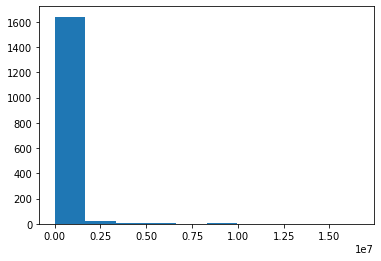

In [21]:
plt.hist(df_normal['likeCount'])

(array([1758.,  186.,  103.,   58.,   61.,   36.,   37.,   32.,   19.,
          20.]),
 array([    0. ,  9994.1, 19988.2, 29982.3, 39976.4, 49970.5, 59964.6,
        69958.7, 79952.8, 89946.9, 99941. ]),
 <BarContainer object of 10 artists>)

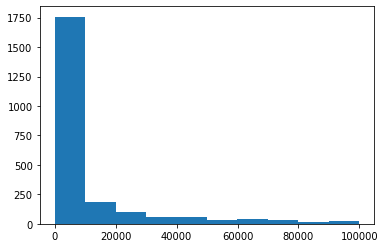

In [80]:
plt.hist(df_normal[df_normal['likeCount']<1e5]['likeCount'])

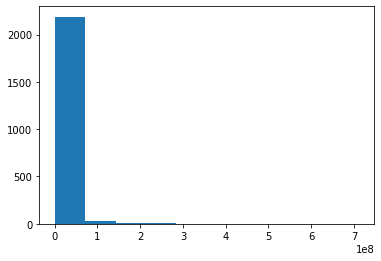

In [22]:
plt.hist(df_normal['viewCount']);

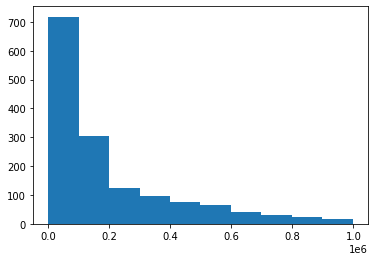

In [23]:
plt.hist(df_normal[df_normal['viewCount']<1e6]['viewCount']);

(array([3.09e+03, 1.09e+02, 6.00e+00, 4.00e+00, 5.00e+00, 1.00e+00,
        4.00e+00, 3.00e+00, 3.00e+00, 2.50e+01]),
 array([    0. ,  8637.9, 17275.8, 25913.7, 34551.6, 43189.5, 51827.4,
        60465.3, 69103.2, 77741.1, 86379. ]),
 <BarContainer object of 10 artists>)

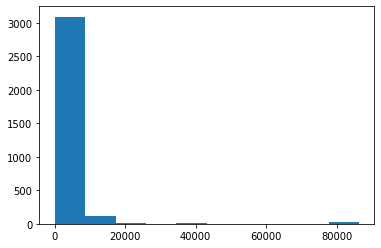

In [83]:
plt.hist(df_normal_preprocessed['durationInt'])

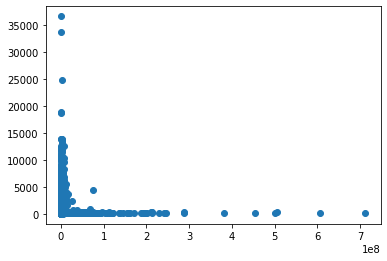

In [24]:
plt.scatter(df_normal_preprocessed['viewCount'], df_normal_preprocessed['durationInt'])

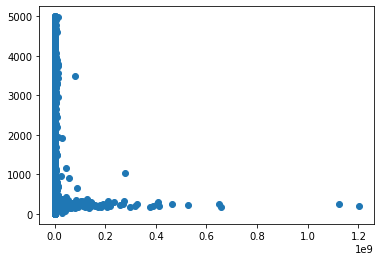

In [85]:
plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3]['durationInt'])

/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_1416/1613510240.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['durationInt'])


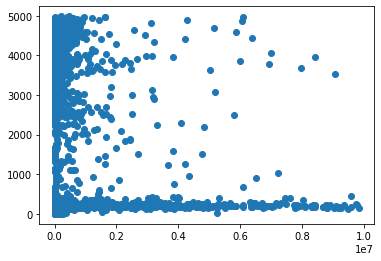

In [25]:

plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['durationInt'])

##### Quan h·ªá gi·ªØa c√°c thu·ªôc t√≠nh

In [26]:
corr = df_normal_preprocessed.corr()
print(df_normal_preprocessed.head(5))

            id             publishAt  \
0  8zKpSM3kDt4  2022-06-25T10:21:40Z   
1  PnITknczlvU  2022-06-25T10:30:04Z   
3  0zpVSx9LHao  2021-06-09T11:00:00Z   
4  5BQKXF56e8A  2022-04-11T12:00:03Z   
5  yJFTFdgH5Bc  2022-05-22T03:00:18Z   

                                               title  \
0  Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...   
1  EDM TikTok Hay 2022 - BXH Nh·∫°c Tr·∫ª Remix Hay N...   
3  Top 40 B√†i H√°t Vpop ƒê·∫°t H√†ng Tri·ªáu Views Tr√™n ...   
4  Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n Kh√∫c Nh·∫°c ...   
5  TOP 40 B√†i H√°t Nh·∫°c Tr·∫ª H√†ng Tri·ªáu View Hay Nh...   

                                         description        channelTitle  \
0  Nh·∫°c Tr·∫ª M·ªõi Hay Nh·∫•t 2022 - Li√™n Kh√∫c Nh·∫°c Tr...  ACV Music Trending   
1  EDM TikTok Hay 2022 - BXH Nh·∫°c Tr·∫ª Remix Hay N...         Orinn Remix   
3  Top 40 B√†i H√°t Vpop ƒê·∫°t H√†ng Tri·ªáu Views Tr√™n ...  TPT Music For Life   
4  Say th√¨ c·ª© say y√™u th√¨ b·ªè ƒëi - Li√™n

In [88]:
df_normal_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3250 entries, 0 to 4960
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3250 non-null   object 
 1   publishAt             3250 non-null   object 
 2   title                 3250 non-null   object 
 3   description           3250 non-null   object 
 4   channelTitle          3250 non-null   object 
 5   tags                  3250 non-null   object 
 6   categoryId            3250 non-null   int64  
 7   defaultAudioLanguage  3250 non-null   object 
 8   duration              3250 non-null   object 
 9   dimension             3250 non-null   object 
 10  definition            3250 non-null   int64  
 11  caption               3250 non-null   int64  
 12  privacyStatus         3250 non-null   int64  
 13  embeddable            3250 non-null   int64  
 14  madeForKids           3250 non-null   int64  
 15  viewCount            

<AxesSubplot:>

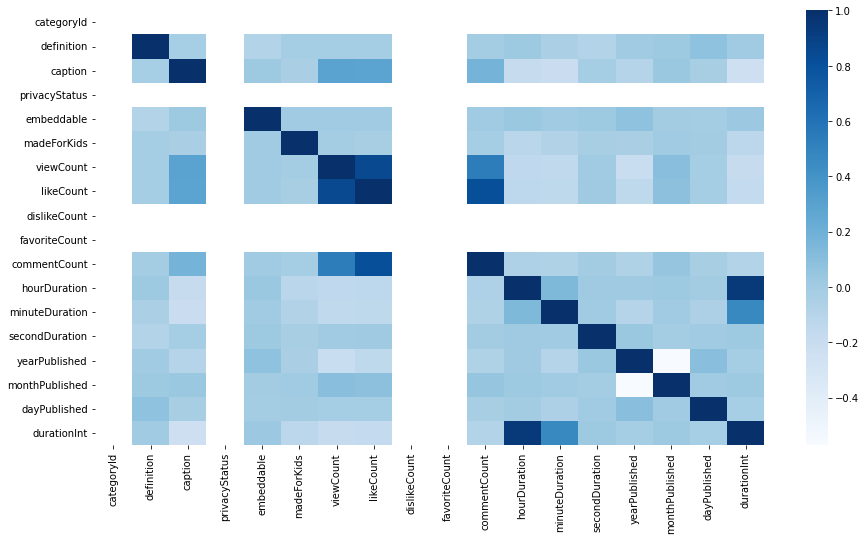

In [27]:
plt.figure(figsize=(15,8))
heatmap_df_normal_preprocess = df_normal_preprocessed[['viewCount','likeCount','dislikeCount','commentCount', 'favoriteCount']]
corr = df_normal_preprocessed.corr()
sns.heatmap(corr, cmap='Blues')

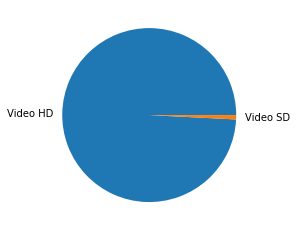

In [28]:
# plt.figure(figsize=(8,16))

# plt.scatter(df_normal_preprocessed['definition'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

hd_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]
sd_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]

y = np.array([hd_videos.shape[0], sd_videos.shape[0]])
mylabel = ['Video HD', 'Video SD']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

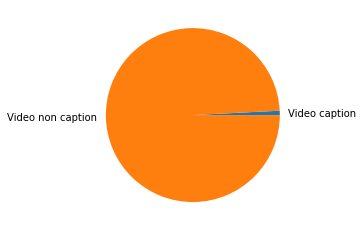

In [29]:
# plt.scatter(df_normal_preprocessed['caption'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Caption')
# plt.xlabel('Caption')
# plt.ylabel('View count')

df_normal['caption'].unique()

caption_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_caption_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([caption_videos.shape[0], non_caption_videos.shape[0]])
mylabel = ['Video caption', 'Video non caption']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

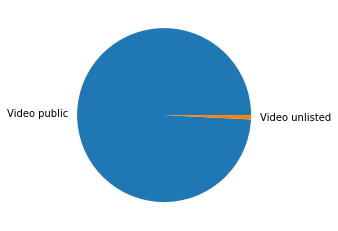

In [30]:
# plt.scatter(df_normal_preprocessed['privacyStatus'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

df_normal['privacyStatus'].unique()

public_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]
unlisted_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]

y = np.array([public_videos.shape[0], unlisted_videos.shape[0]])
mylabel = ['Video public', 'Video unlisted']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

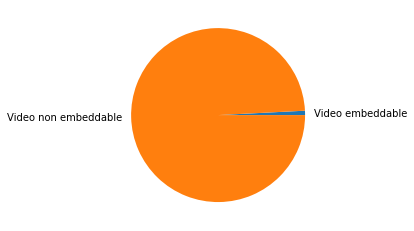

In [31]:
# plt.scatter(df_normal_preprocessed['embeddable'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

# df_normal['embeddable'].unique()

embeddable_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_embeddable_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([embeddable_videos.shape[0], non_embeddable_videos.shape[0]])
mylabel = ['Video embeddable', 'Video non embeddable']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

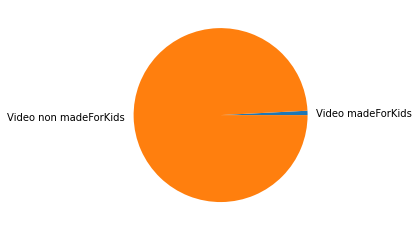

In [32]:
# plt.scatter(df_normal_preprocessed['madeForKids'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

# df_normal['madeForKids'].unique()
# test = df_normal[df_normal['madeForKids']==False]
madeForKids_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_madeForKids_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([madeForKids_videos.shape[0], non_madeForKids_videos.shape[0]])
mylabel = ['Video madeForKids', 'Video non madeForKids']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

#### Chuy·ªÉn text th√†nh vector IF TDF

In [33]:
def convertIfTdf(df, column, stopwords):
    data_train = df[column]
    data_train = removeStopword(data_train, stopwords)

    module_count_vector = TfidfVectorizer(stop_words=stopwords)
    model_rf_preprocess = Pipeline([('vect', module_count_vector),
                        ('tfidf', TfidfTransformer()),
                        ])
    # H√†m th·ª±c hi·ªán chuy·ªÉn ƒë·ªïi d·ªØ li·ªáu text th√†nh d·ªØ li·ªáu s·ªë d·∫°ng ma tr·∫≠n 
    # Input: D·ªØ li·ªáu 2 chi·ªÅu d·∫°ng numpy.array, m·∫£ng nh√£n id d·∫°ng numpy.array 
    data_preprocessed = module_count_vector.fit_transform(data_train)

    print(f"\nS·ªë l∆∞·ª£ng t·ª´ trong t·ª´ ƒëi·ªÉn: {len(module_count_vector.vocabulary_)}")
    print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi x·ª≠ l√Ω: {data_preprocessed.shape}")
    print(f"Xem c√°c t·ª´ trong t·ª´ ƒëi·ªÉn: {module_count_vector.vocabulary_}")
    print(type(data_preprocessed))
    return data_preprocessed


In [34]:
stopwords = [ 'official', 'mv', 'video', 'music', 'nh·∫°c', '√¢m', 'h√°t', 'tuy·ªÉn', 't·∫≠p', 'b√†i', 'nh·ªØng', 'ca', ' x ', 'ft','feat']
X = convertIfTdf(df_normal_preprocessed,'title', stopwords)
print(type(X))


S·ªë l∆∞·ª£ng t·ª´ trong t·ª´ ƒëi·ªÉn: 3786
K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi x·ª≠ l√Ω: (2241, 3786)
Xem c√°c t·ª´ trong t·ª´ ƒëi·ªÉn: {'tr·∫ª': 3170, 'm·ªõi': 2014, 'hay': 1180, 'nh·∫•t': 2147, '2022': 61, 'li√™n': 1661, 'kh√∫c': 1514, 'hi·ªán': 1218, 'nay': 2048, 'ch·ªçn': 571, '128': 37, 'edm': 894, 'tiktok': 3069, 'bxh': 424, 'remix': 2537, 'top': 3101, '20': 54, 'b·∫£n': 454, '40': 86, 'vpop': 3348, 'ƒë·∫°t': 3645, 'h√†ng': 1265, 'tri·ªáu': 3133, 'views': 3329, 'tr√™n': 3147, 'b·∫£ng': 455, 'x·∫øp': 3516, 'h·∫°ng': 1291, 'say': 2647, 'th√¨': 3014, 'c·ª©': 699, 'y√™u': 3556, 'b·ªè': 468, 'ƒëi': 3595, 'th·∫•t': 3035, 't√¨nh': 3225, 'c·∫•m': 686, 'nghe': 2073, 'v·ªÅ': 3394, 'ƒë√™m': 3623, 'view': 3328, 'hits': 1212, 'ng√†y': 2095, 'ƒë·∫ßu': 3649, 'ti√™n': 3080, '30': 81, 'lofi': 1673, 'chill': 507, 'nonstop': 2179, 'bass': 302, 'c·ª±c': 702, 'm·∫°nh': 1994, 'vi·ªát': 3341, 'mix': 1906, 'dj': 793, 'vinahouse': 3330, '15': 40, 'hot': 1234, 'orinn': 2271, 'lk': 1665, 'g√¢y': 1128, 'ng

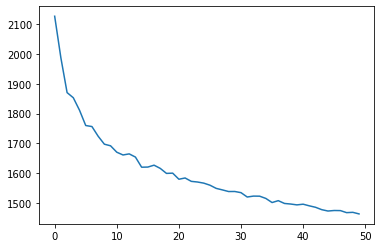

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
loss = []
for i in range(50):
    i = i + 1
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    loss.append(kmeans.inertia_)
plt.plot(range(50), loss)

In [36]:
clustering = KMeans(n_clusters=10,init='k-means++', random_state=0).fit(X)
clustering.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00036842, 0.00117141, 0.00030513, ..., 0.00053988, 0.00134854,
        0.00046807],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00287289, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [37]:
label = clustering.labels_
print(label.shape)
for i in label:
    print(i)

(2241,)
5
8
2
2
2
7
3
8
3
2
2
6
3
3
9
3
3
1
8
2
2
5
0
3
3
5
2
1
8
5
5
8
2
5
5
5
5
5
5
5
8
3
3
8
3
2
5
5
5
3
3
3
3
2
8
5
8
5
5
5
5
5
3
3
3
8
5
3
5
5
8
5
5
8
5
5
5
5
5
3
5
5
5
8
2
3
8
5
5
2
8
5
3
2
5
5
3
5
8
5
3
2
5
8
8
8
5
5
5
3
1
3
5
5
2
2
5
5
2
8
3
5
5
8
5
5
8
3
2
2
5
3
3
3
2
5
8
5
5
3
2
8
3
5
2
2
3
8
7
8
3
2
3
8
5
3
2
1
8
2
0
6
3
8
6
8
2
8
8
8
5
3
5
8
7
3
2
0
2
8
8
3
8
2
5
6
8
2
3
5
3
2
5
3
9
8
3
2
9
5
9
5
8
2
3
5
6
3
3
5
8
2
3
5
5
8
2
3
2
3
2
5
3
3
2
3
3
3
2
2
2
1
5
3
5
3
3
5
2
3
8
5
3
6
2
8
2
1
3
3
1
3
2
2
6
1
3
5
2
8
2
9
3
2
1
5
3
2
5
5
5
2
1
1
1
1
3
1
1
2
1
5
5
3
7
3
5
1
3
6
1
5
3
3
5
2
6
2
2
2
2
6
2
2
2
2
2
6
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
2
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
8
2
0
0
0
0
6
1
1
2
6
1
3
0
6
2
2
0
2
9
6
1
2
1


In [38]:
temp_df = df_normal_preprocessed.assign(label=label)
temp_df = temp_df.assign(topics = listTopics)
temp_df.info()

for i in range(len(np.unique(label))):
    print(i)
    filter_df = temp_df[label==i]
    filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241 entries, 0 to 3187
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2241 non-null   object 
 1   publishAt             2241 non-null   object 
 2   title                 2241 non-null   object 
 3   description           2241 non-null   object 
 4   channelTitle          2241 non-null   object 
 5   tags                  2241 non-null   object 
 6   categoryId            2241 non-null   int64  
 7   defaultAudioLanguage  2241 non-null   object 
 8   duration              2241 non-null   object 
 9   dimension             2241 non-null   object 
 10  definition            2241 non-null   int64  
 11  caption               2241 non-null   int64  
 12  privacyStatus         2241 non-null   int64  
 13  embeddable            2241 non-null   int64  
 14  madeForKids           2241 non-null   int64  
 15  viewCount            

In [39]:
def drawWordCloud(df, column, stopwords):
  for i in range(len(np.unique(label))):
      
      #Extract cleaned text column
      data=df[df['label']==i][column].values
      data = removeStopword(data, stopwords)
      list_of_words=[];
      for sent in data:
        if type(sent)!=str:
          continue
        for word in sent.split():
          list_of_words.append(word)  
      final_text=" ".join(list_of_words)
      wordcloud = WordCloud(collocations=False).generate(final_text)
      plt.figure()
      title="\nCluster : "+str(i+1)+"\n Number of Videos : "+str(len(data))
      plt.title(title)
      plt.imshow(wordcloud, interpolation="bilinear")
      plt.axis("off")
      plt.show()



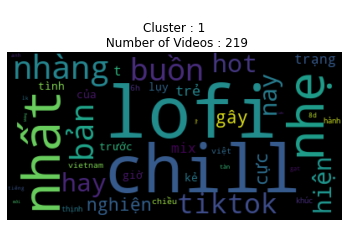

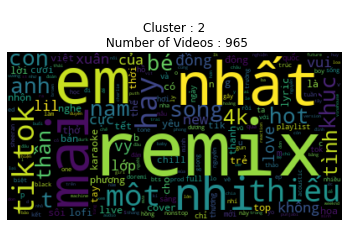

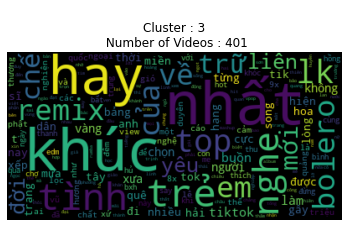

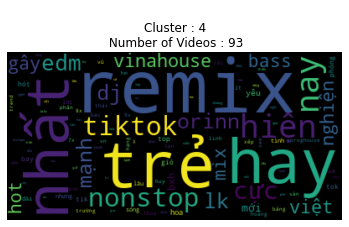

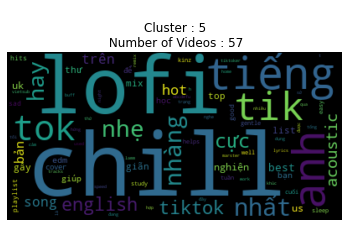

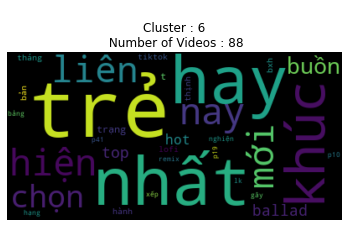

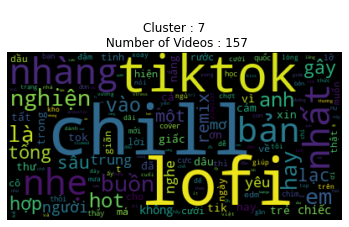

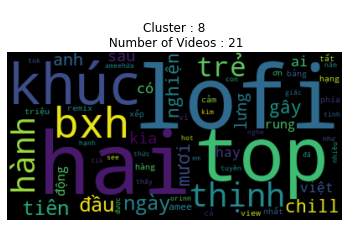

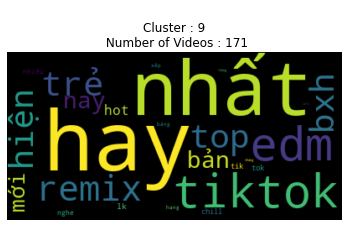

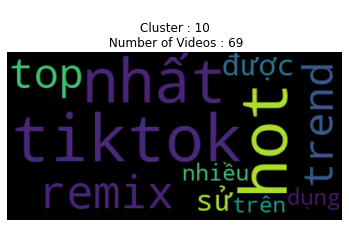

In [40]:
drawWordCloud(temp_df,'title', stopwords)

0


/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_1416/1180833226.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_1416/1180833226.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_1416/1180833226.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_1416/1180833226.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


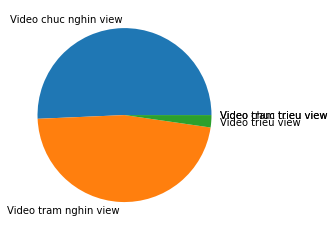

1


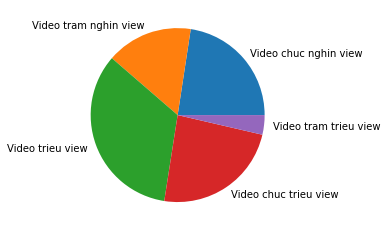

2


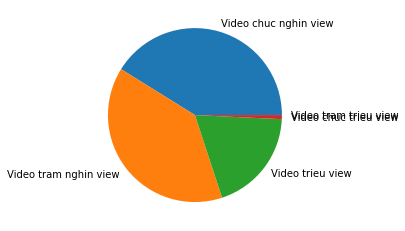

3


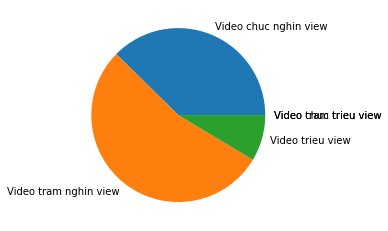

4


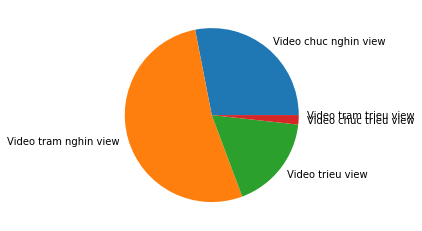

5


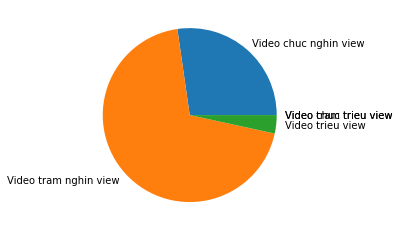

6


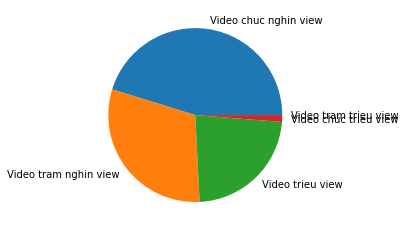

7


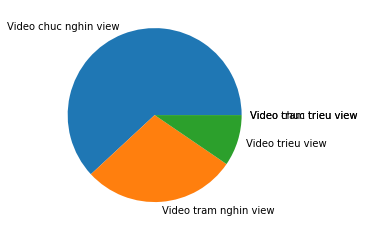

8


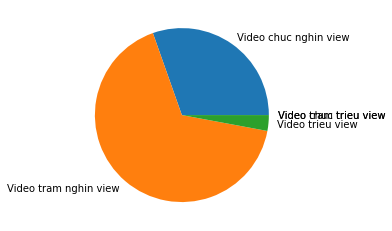

9


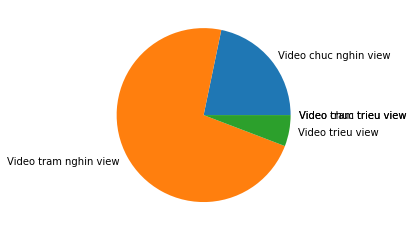

In [41]:
for i in range(len(np.unique(label))):
    print(i)
    pieCharViewCounts(temp_df[temp_df['label']==i])

In [42]:
clustered_df = temp_df.groupby(['label']).sum()

In [43]:
clustered_df[['viewCount', 'likeCount', 'durationInt']]

viewCount    likeCount  durationInt
label                                       
0         31860304     587867.0       845424
1      16729066349  329533149.0       691363
2        318852109    3061617.0      1951462
3         34036387     139875.0       361945
4         51459709     718810.0       180257
5         25254574      69241.0       505424
6        147754758    1577923.0       519501
7          4721984      14042.0       151747
8         51752084    1136116.0       818114
9         31068040     347565.0       303006

In [44]:
abnormal_cluster = temp_df[temp_df['label']==6]
# abnormal_cluster = abnormal_cluster[abnormal_cluster['label']==2]

In [45]:
stopwords = [ 'official', 'mv', 'video', 'music', 'nh·∫°c', '√¢m', 'h√°t', 'tuy·ªÉn', 't·∫≠p', 'b√†i', 'nh·ªØng', 'ca', ' x ', 'ft','feat']
X_abnormal = convertIfTdf(abnormal_cluster,'title', stopwords)
print(type(X_abnormal))
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=0).fit(X_abnormal)
kmeans.cluster_centers_

label = kmeans.labels_

print(label.shape)
for i in label:
    print(i)
abnormal_cluster = abnormal_cluster.assign(label = label)


S·ªë l∆∞·ª£ng t·ª´ trong t·ª´ ƒëi·ªÉn: 401
K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi x·ª≠ l√Ω: (157, 401)
Xem c√°c t·ª´ trong t·ª´ ƒëi·ªÉn: {'acoustic': 19, '8x9x': 17, 'x∆∞a': 362, 'chill': 46, 'nh·∫π': 225, 'nh√†ng': 218, 'top': 312, 'tr·∫ª': 321, 'hot': 118, 'tiktok': 307, 'mu·ªën': 185, 'em': 92, 'l√†': 159, 'remix': 257, 'ch·ªù': 57, 'ng√†y': 207, 'c∆∞·ªõi': 73, 'bxh': 38, 'g√¢y': 108, 'nghi·ªán': 205, 'm·ªõi': 201, 'nh·∫•t': 223, '2022': 8, 'hay': 112, '2021': 7, 'b·ªè': 44, 'v√†o': 347, 'baloc√¥': 29, '·∫•y': 399, 'n√≥i': 228, 'bu·ªìn': 36, 'tr·∫°ng': 319, 'thanh': 282, 'xu√¢n': 361, 'b·∫£n': 42, 'cover': 61, 'th∆∞': 296, 'gi√£n': 96, 'ƒë√°m': 376, 'mi·ªÅn': 183, 't√¢y': 327, 'nekko': 203, 'c∆∞a': 72, 'ƒë·ªï': 394, 'y√™u': 366, 'khu√™': 141, 'm·ªôc': 198, 'lang': 151, 'edm': 91, 'hi·ªán': 114, 'nay': 202, 'c·∫£m': 76, '∆°n': 397, 'v√¨': 348, 't·∫•t': 332, 'c·∫£': 75, 'orinn': 240, 'anh': 23, 'qu√¢n': 249, 'idol': 133, 'tik': 306, 'tok': 311, 'th∆∞∆°ng': 297, 'ƒë·∫øn': 391, 'g√¨a': 109

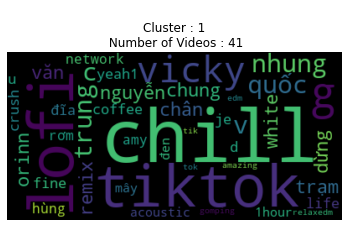

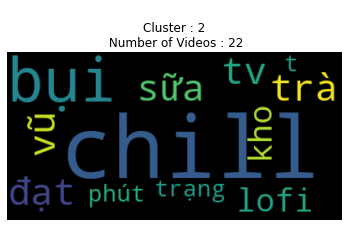

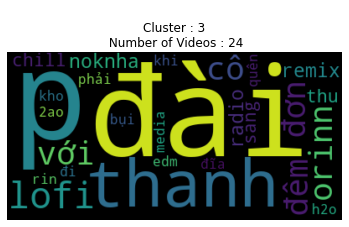

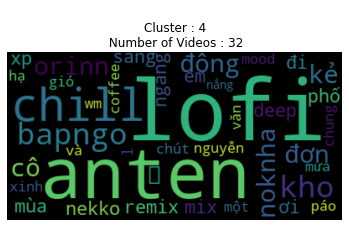

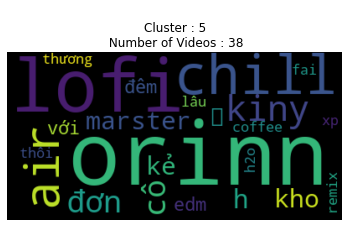

In [46]:
for i in range(len(np.unique(label))):
    
    #Extract cleaned text column
    data=abnormal_cluster[abnormal_cluster['label']==i]['channelTitle'].values
    data = removeStopword(data, stopwords)
    list_of_words=[];
    for sent in data:
      if type(sent)!=str:
        continue
      for word in sent.split():
        list_of_words.append(word)  
    final_text=" ".join(list_of_words)
    wordcloud = WordCloud(collocations=False).generate(final_text)
    plt.figure()
    title="\nCluster : "+str(i+1)+"\n Number of Videos : "+str(len(data))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


0


/var/folders/lv/hcn20sp51tz2bc1v6l7vdn200000gn/T/ipykernel_2183/1180833226.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/var/folders/lv/hcn20sp51tz2bc1v6l7vdn200000gn/T/ipykernel_2183/1180833226.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/var/folders/lv/hcn20sp51tz2bc1v6l7vdn200000gn/T/ipykernel_2183/1180833226.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/var/folders/lv/hcn20sp51tz2bc1v6l7vdn200000gn/T/ipykernel_2183/1180833226.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


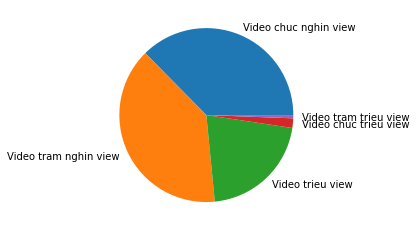

1


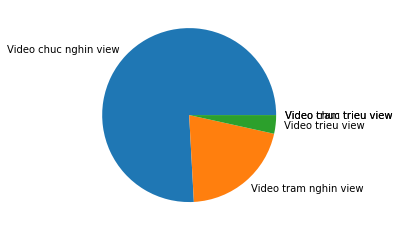

2


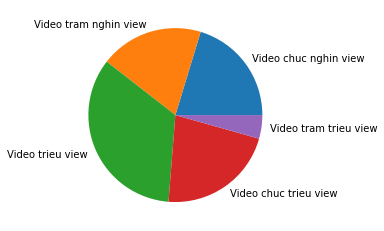

3


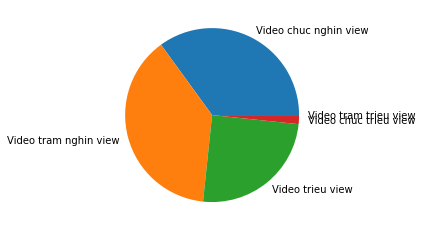

4


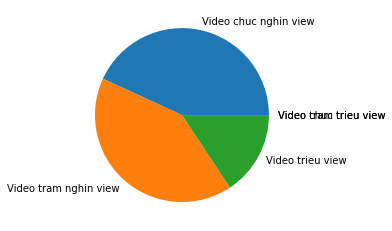

In [109]:
for i in range(len(np.unique(label))):
    print(i)
    pieCharViewCounts(abnormal_cluster[abnormal_cluster['label']==i])

In [110]:
clustered_02_abnormal = abnormal_cluster[abnormal_cluster['label']!=2].sum()
clustered_02_abnormal[['viewCount', 'likeCount', 'durationInt']]

viewCount      994396138
likeCount      7257261.0
durationInt      2442637
dtype: object

In [111]:
clustered_01_abnormal = abnormal_cluster[abnormal_cluster['label']==2].sum()
clustered_01_abnormal[['viewCount', 'likeCount', 'durationInt']]

viewCount      22540015279
likeCount      468590668.0
durationInt         724511
dtype: object

In [112]:
for item in abnormal_cluster[abnormal_cluster['label']==0]['title']:
    print(item)

TOP Nh·ªØng B√†i H√°t ƒêANG G√ÇY B√ÉO Tr√™n C√°c BXH √Çm Nh·∫°c | Nh∆∞ M·ªôt Ng∆∞·ªùi D∆∞ng, Ng∆∞·ªùi L·∫° Tho√°ng qua
TOP Nh·ªØng B√†i H√°t ƒêANG G√ÇY B√ÉO Tr√™n C√°c BXH √Çm Nh·∫°c | Ng∆∞·ªùi L·∫° Tho√°ng Qua, H·∫πn Ki·∫øp Sau
NAM EM PLAYLIST | NG∆Ø·ªúI K·ªÇ CHUY·ªÜN T√åNH B·∫∞NG √ÇM NH·∫†C
√ÇM NH·∫†C 6 - Nh·ªØng ∆∞·ªõc m∆° KARAOKE - K·∫æT N·ªêI TRI TH·ª®C
TOP Nh·ªØng B√†i H√°t ƒêANG G√ÇY B√ÉO Tr√™n C√°c BXH √Çm Nh·∫°c | Ai Chung T√¨nh ƒê∆∞·ª£c M√£i, Ng∆∞·ªùi L·∫° Tho√°ng Qua
Lk M·∫π Hi·ªÅn Quan √Çm - Nh·∫°c Ph·∫≠t Gi√°o Ch·ªçn L·ªçc 2021 Tƒ©nh T√¢m Xua Tan Bu·ªìn Phi·ªÅn
[H√ÅT M·∫™U] CH√ÄO NG∆Ø·ªúI B·∫†N M·ªöI ƒê·∫æN - √ÇM NH·∫†C L·ªöP 1 K·∫æT N·ªêI TRI TH·ª®C V·ªöI CU·ªòC S·ªêNG - PH·∫†M HO√ÄI LINH
Con Chim Non - Karaoke √Çm Nh·∫°c L·ªõp 3 | L·ªõp Nh·∫°c Doremi
Gi·∫•c m∆° tr∆∞a - T√πng D∆∞∆°ng (liveshow Con ƒë∆∞·ªùng √¢m nh·∫°c)
S·∫ÆC M√ÄU √ÇM NH·∫†C | TH√ÅNG 10 - 2021 | NG∆Ø·ªúI D√åU CON ƒêI
[√Çm Nh·∫°c X·ª© N·∫´u] #03: Li√™n Kh√∫c Nh·∫°c Ngo·∫°i L·ªùi Vi·ªát | MV Quay t·∫°i Ph√∫ 

In [113]:
print(wordcloud.words_)

{'bolero': 1.0, 'yan': 0.56, 's·ªëng': 0.52, 'beat': 0.24, 'ch·∫•t': 0.24, 'l∆∞·ª£ng': 0.24, 'o': 0.24, 'qu√™': 0.2, 'h·ªìng': 0.16, 'l√∫a': 0.16, 'xinh': 0.16, 'tu·∫•n': 0.12, 'chung': 0.12, 'giai': 0.12, 'ƒëi·ªáu': 0.12, 's√¥ng': 0.12, 'vƒÉn': 0.12, 'ph√∫': 0.12, 'g√°i': 0.12, 'hay': 0.12, 'ƒë·∫£o': 0.08, 'v√†ng': 0.08, 'trangpi': 0.08, 'bikini': 0.04, 'y√™u': 0.04, 'mi·ªÅn': 0.04, 't√¢y': 0.04, 'tn': 0.04, 'thanh': 0.04, 'h·∫£i': 0.04, 'th√¥n': 0.04, 'nh·∫•t': 0.04, 'th√∫y': 0.04, 'x∆∞a': 0.04, 'tuy·ªát': 0.04, 'ph·∫©m': 0.04, 'b∆∞·ªõm': 0.04}


# Test Gaussian Mixture Clustering

In [47]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=0).fit(X.toarray())

In [115]:
dir(gm)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_initial_parameters',
 '_check_n_features',
 '_check_parameters',
 '_compute_lower_bound',
 '_e_step',
 '_estimate_log_prob',
 '_estimate_log_prob_resp',
 '_estimate_log_weights',
 '_estimate_weighted_log_prob',
 '_estimator_type',
 '_get_param_names',
 '_get_parameters',
 '_get_tags',
 '_initialize',
 '_initialize_parameters',
 '_m_step',
 '_more_tags',
 '_n_parameters',
 '_print_verbose_msg_init_beg',
 '_print_verbose_msg_init_end',
 '_print_verbose_msg_iter_end',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundl

In [117]:
gm.score(X.toarray())


20246.778195999126

In [118]:
gm.covariances_

array([[[ 1.39492189e-04, -5.70394670e-08, -9.14841983e-08, ...,
         -7.27374296e-08, -4.31779711e-08, -4.31779711e-08],
        [-5.70394670e-08,  8.45883692e-05, -5.02493739e-08, ...,
         -3.99523673e-08, -2.37162926e-08, -2.37162926e-08],
        [-9.14841983e-08, -5.02493739e-08,  1.09550040e-04, ...,
         -6.40786194e-08, -3.80379784e-08, -3.80379784e-08],
        ...,
        [-7.27374296e-08, -3.99523673e-08, -6.40786194e-08, ...,
          1.36928597e-04, -3.02433079e-08, -3.02433079e-08],
        [-4.31779711e-08, -2.37162926e-08, -3.80379784e-08, ...,
         -3.02433079e-08,  4.88982225e-05,  4.78982225e-05],
        [-4.31779711e-08, -2.37162926e-08, -3.80379784e-08, ...,
         -3.02433079e-08,  4.78982225e-05,  4.88982225e-05]],

       [[ 1.00000000e-06,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.00000000e-06,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e

In [120]:
a=gm.predict(X.toarray())


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
